# 0. 준비단계

In [1]:
# 라이브러리 호출
import os
import numpy as np
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# 현재 작업 경로 확인
os.getcwd()

'C:\\Users\\kim jeongah\\OneDrive\\Desktop\\DMF\\DBR_Project\\DBR_Project\\code'

In [3]:
# data 폴더로 작업 경로 변경
os.chdir(path = '../data')

In [4]:
# 현재 작업 경로에 있는 폴더명과 파일명 확인
os.listdir()

['22_Prep.pkl',
 '23_Prep.pkl',
 'df22.pkl',
 'df23.pkl',
 'Naver_News_List.pkl',
 'Naver_News_Reply.pkl',
 'Text_Prep.pkl']

In [5]:
# pkl 파일을 읽고 corpus, tfs 및 dtm 생성
# [참고] pkl 파일로 저장할 때 지정한 파이썬 객체의 개수만큼 변수를 지정해야 함
corpus, tfs, dtm = pd.read_pickle(filepath_or_buffer = '23_Prep.pkl')

In [6]:
# 현재 사용 중인 컴퓨터에 설치한 전체 폰트 파일명을 리스트로 반환
fontList = fm.findSystemFonts(fontext = 'ttf')

# fontList 확인
fontList

['C:\\Windows\\Fonts\\BIZ-UDGothicR.ttc',
 'C:\\Windows\\Fonts\\georgiaz.ttf',
 'C:\\Windows\\Fonts\\couri.ttf',
 'C:\\Windows\\Fonts\\timesbd.ttf',
 'C:\\Windows\\Fonts\\monbaiti.ttf',
 'C:\\Windows\\Fonts\\segoeuisl.ttf',
 'C:\\Windows\\Fonts\\segoeuii.ttf',
 'C:\\Windows\\Fonts\\SegoeIcons.ttf',
 'C:\\Windows\\Fonts\\timesbi.ttf',
 'C:\\Windows\\Fonts\\msgothic.ttc',
 'C:\\Windows\\Fonts\\corbelli.ttf',
 'C:\\Windows\\Fonts\\msjhl.ttc',
 'C:\\Windows\\Fonts\\constanb.ttf',
 'C:\\Windows\\Fonts\\tahoma.ttf',
 'C:\\Windows\\Fonts\\verdanab.ttf',
 'C:\\Windows\\Fonts\\calibril.ttf',
 'C:\\Windows\\Fonts\\seguisli.ttf',
 'C:\\Windows\\Fonts\\taileb.ttf',
 'C:\\Windows\\Fonts\\segoepr.ttf',
 'C:\\Windows\\Fonts\\constani.ttf',
 'C:\\Windows\\Fonts\\trebuc.ttf',
 'C:\\Windows\\Fonts\\UDDigiKyokashoN-B.ttc',
 'C:\\Windows\\Fonts\\cambriaz.ttf',
 'C:\\Windows\\Fonts\\verdanaz.ttf',
 'C:\\Windows\\Fonts\\LeelaUIb.ttf',
 'C:\\Windows\\Fonts\\segoeuib.ttf',
 'C:\\Windows\\Fonts\\verdana.ttf',


In [7]:
# 리스트에서 특정 문자열(폰트명)을 포함하는 파일명 선택
fontPath = [font for font in fontList if 'batang' in font]

# fontPath 확인
fontPath

['C:\\Windows\\Fonts\\batang.ttc']

In [8]:
# 반복문으로 컴퓨터에 설치한 폰트명 출력
for font in fontPath:
    print(fm.FontProperties(fname = font).get_name())

Batang


In [9]:
# 한글폰트와 글자 크기 설정
# [참고] 폰트를 설치하고 .matplotlib 폴더에서 fontlist-v3xx.json 파일을 삭제해야 함
plt.rc(group = 'font', family = 'Batang', size = 10)

In [10]:
# 그래프 크기와 해상도 설정
plt.rc(group = 'figure', figsize = (8, 4), dpi = 100)

# 1. 고빈도 단어 시각화

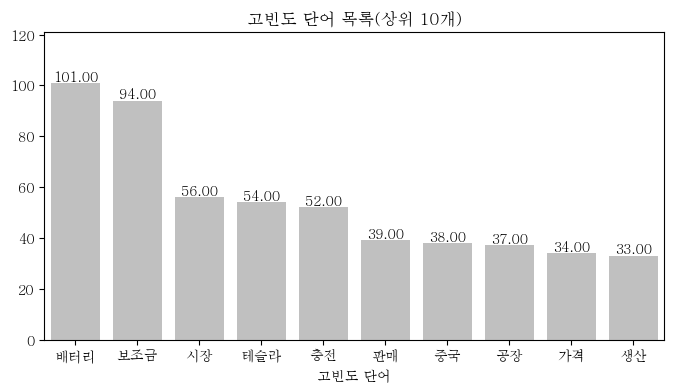

In [11]:
tfs_top10 = tfs.head(n = 10)
sns.barplot(x = tfs_top10.index, y = tfs_top10.values, color = 'silver')
plt.title(label = '고빈도 단어 목록(상위 10개)')
plt.xlabel(xlabel = '고빈도 단어')
plt.ylim(0, tfs_top10.max() * 1.2)
for i, v in enumerate(tfs_top10):
    plt.text(x = i, y = v, s = f'{v:.2f}', ha = 'center', va = 'bottom');

# 2. 워드 클라우드 시각화

In [12]:
freq = dict()

In [13]:
# 워드 클라우드 시각화용 딕셔너리 생성
# [참고] 키는 단어, 값은 단어의 도수임
for word in dtm.columns:
    freq[word] = dtm[word].sum()

In [14]:
# 컬러맵(팔레트) 목록 확인
# [참고] '_r'이 붙은 속성이 팔레트이며, '_r'은 reverse를 의미
dir(plt.cm)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'ColormapRegistry',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Grays',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'Mapping',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '_LUTSIZE',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '

In [26]:
# 워드 클라우드 객체 생성
wc = WordCloud(
    font_path = fontPath[0],
    width = 800, 
    height = 800, 
    background_color = 'black', 
    colormap = 'Pastel1'
)

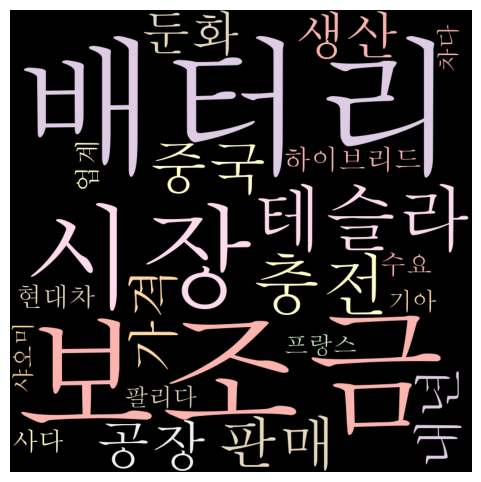

In [27]:
# 워드 클라우드를 시각화
plt.figure(figsize = (6, 6), dpi = 100)
wcgf = wc.generate_from_frequencies(frequencies = freq)
plt.imshow(X = wcgf)
plt.axis('off')
plt.show()

# 3. 연관 단어 시각화

In [28]:
# 단어 간 상관계수 행렬 생성
# [참고] 열(차원) 개수가 많을수록 오래 걸림
corMat = dtm.corr().round(4)

In [29]:
# corMat의 일부 확인
corMat.iloc[0:10, 0:10]

,가격,공장,기아,내년,둔화,배터리,보조금,사다,생산,샤오미
가격,1.0000,-0.0463,-0.0000,-0.0434,0.0245,0.0652,-0.0596,0.1248,-0.0448,-0.0363
공장,-0.0463,1.0000,-0.0031,-0.0441,0.0504,0.0713,-0.0802,-0.0353,0.0710,-0.0369
기아,-0.0000,-0.0031,1.0000,0.0034,0.0058,-0.0650,0.0519,0.0102,0.0387,-0.0297
내년,-0.0434,-0.0441,0.0034,1.0000,0.0294,-0.0569,0.0054,-0.0331,0.0225,0.0843
둔화,0.0245,0.0504,0.0058,0.0294,1.0000,0.1416,-0.0518,-0.0320,-0.0076,-0.0334
배터리,0.0652,0.0713,-0.0650,-0.0569,0.1416,1.0000,-0.0358,-0.0232,0.0134,-0.0635
보조금,-0.0596,-0.0802,0.0519,0.0054,-0.0518,-0.0358,1.0000,-0.0402,-0.0190,-0.0630
사다,0.1248,-0.0353,0.0102,-0.0331,-0.0320,-0.0232,-0.0402,1.0000,-0.0342,-0.0277
생산,-0.0448,0.0710,0.0387,0.0225,-0.0076,0.0134,-0.0190,-0.0342,1.0000,-0.0358
샤오미,-0.0363,-0.0369,-0.0297,0.0843,-0.0334,-0.0635,-0.0630,-0.0277,-0.0358,1.0000


In [30]:
# 키워드 연관 단어로 막대 그래프를 그리는 함수 생성
def plot_assocs(keyword, n = 10, pal = 'Greys_r'):
    assocs = corMat[keyword].sort_values(ascending = False).head(n = n+1).iloc[1:]
    sns.barplot(x = assocs.index, y = assocs.values, hue = assocs.index, palette = pal)
    plt.title(label = '연관 단어 목록')
    plt.xlabel(xlabel = '고빈도 단어')
    plt.ylim(0, 1.0)
    for i, v in enumerate(assocs):
        plt.text(x = i, y = v, s = f'{v:.2f}', ha = 'center', va = 'bottom')

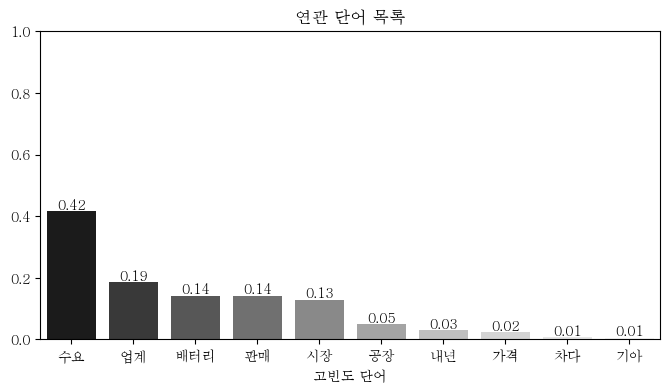

In [31]:
# 연관 단어를 반환하는 함수 테스트
plot_assocs(keyword = '둔화')

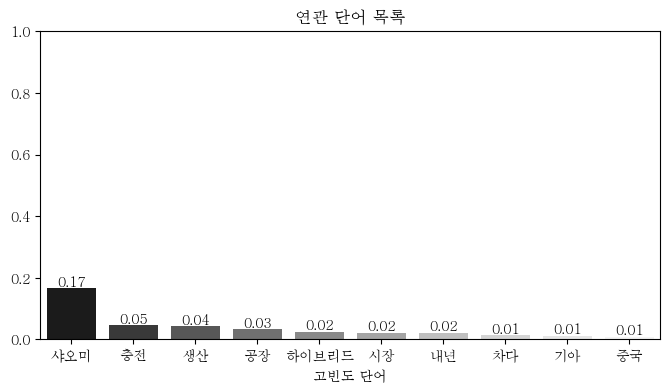

In [32]:
# 연관 단어를 반환하는 함수 테스트
plot_assocs(keyword = '테슬라')

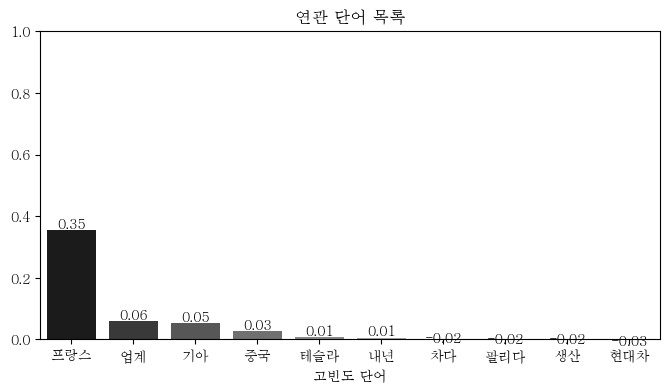

In [33]:
# 연관 단어를 반환하는 함수 테스트
plot_assocs(keyword = '보조금')